# Imports

In [39]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import RocCurveDisplay

# Avaliação do POST Performance

Primeiramente, eu abro o arquivo batch_records.json.

In [40]:

with open("monitoring/batch_records.json", "r") as json_file:
    json_str = json.load(json_file)



A API recebe como body um dicionário com um único elemento cujo a chave é registers.

Este elemento é uma lista de dicionários que contém as variáveis.

In [41]:
data = {"registers": json_str}
performance_response = requests.post("http://0.0.0.0:8001/v1/performance/", json=data)


A API responde com um dicionário que contém:

month_frequency: Dicionário que contém a frequência de cada mês. Os meses são enumerados de 1 a 12.

auc: Área embaixo da curva ROC.

FPRs: Valores de False Positive Rate.

TPRs: Valores de True Positive Rate.

In [42]:
performance_response.json()

{'month_frequency': {'1': 58,
  '2': 55,
  '3': 62,
  '4': 49,
  '5': 67,
  '6': 63,
  '7': 74,
  '8': 72},
 'auc': 0.7375415282392026,
 'FPRs': [0.0, 0.0, 0.0, 0.14285714285714285, 0.8571428571428571, 1.0],
 'TPRs': [0.0,
  0.11627906976744186,
  0.3953488372093023,
  0.5348837209302325,
  0.9534883720930233,
  1.0]}

Os valores podem ser visualizados.

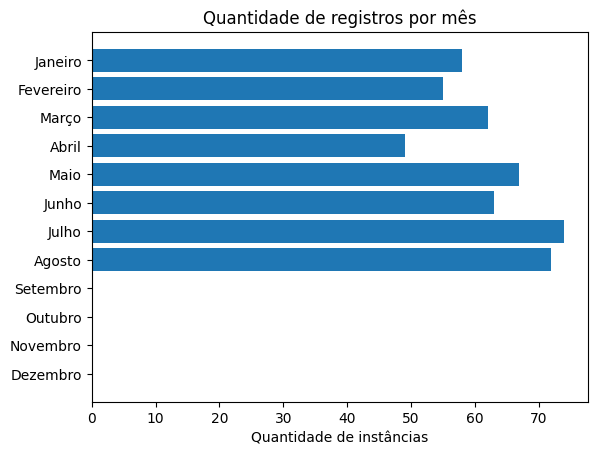

In [43]:
meses = ("Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho",
         "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro")

frequencia = list(performance_response.json()["month_frequency"].values())
while len(frequencia)<12:
    frequencia.append(0)

plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(meses))

ax.barh(y_pos, frequencia, align='center')
ax.set_yticks(y_pos, labels=meses)
ax.invert_yaxis()
ax.set_xlabel('Quantidade de instâncias')
ax.set_title('Quantidade de registros por mês')

plt.show()

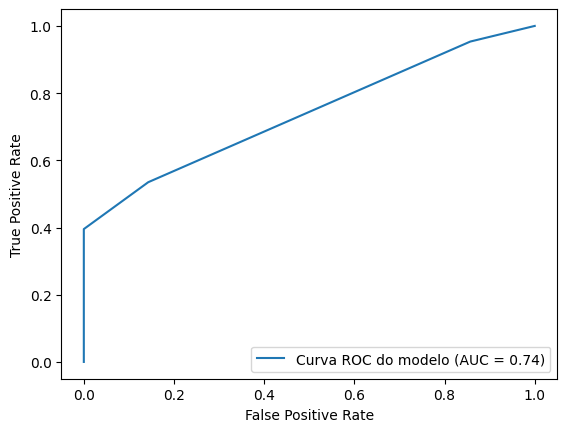

In [44]:
fpr = performance_response.json()["FPRs"]
tpr = performance_response.json()["TPRs"]
auc = performance_response.json()["auc"]
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name="Curva ROC do modelo")
display.plot()
plt.show()

# Avaliação do POST Aderência

A API recebe como body um dicionário com um único elemento cujo a chave é path.

Este elemento é o nome de um arquivo csv no servidor no folder files.

In [45]:
aderencia_response = requests.post("http://0.0.0.0:8001/v1/aderencia/", json={"path": "train"})


A API responde com um dicionário que contém:

ks: O valor retornado pelo teste de Kolmogorov-Smirnov.

test: Distribuição dos valores de Target no dataset de teste.

other: Distribuição predita para o outro dataset passado.

In [46]:
aderencia_response.json()

{'ks': 0.7918289500100382,
 'test': [1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
